In [ ]:
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.utils import resample, shuffle
from sklearn.metrics import adjusted_rand_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset
data=pd.read_csv("/content/drive/MyDrive/Feynn Labs Datasets/mcdonalds.csv")
print(data.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [ ]:
print(data.shape) # Shape of the dataset

(1453, 15)


In [ ]:
print(data.head(3)) # First three rows

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
# Preprocessing the data by converting "Yes" to 1 and "No" to 0
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
# Calculating the mean of each column
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [ ]:
# Performing PCA (Principal Component Analysis)
pca = PCA()
MD_pca = pca.fit_transform(MD)
MD_p = pca.fit(MD)
# Calculating the standard deviation and proportion of variance for each Principal Component (PC)
SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_
index = []
for i in range(len(SD)):
    i = i + 1
    index.append("PC{}".format(i))
# Creating a summary DataFrame with standard deviation, proportion of variance, and cumulative proportion
sum = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [ ]:
# Displaying the standard deviation for each Principal Component
print("Standard Deviation:\n",SD.round(1))
# Calculating the loading matrix (rotational matrix) for each Principal Component
load = (pca.components_)
i = 0
rot_matrix = MD_p.components_.T
# Creating a DataFrame with the loading matrix
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df = round(-rot_df, 3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [ ]:
# Display the loadings matrix again
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


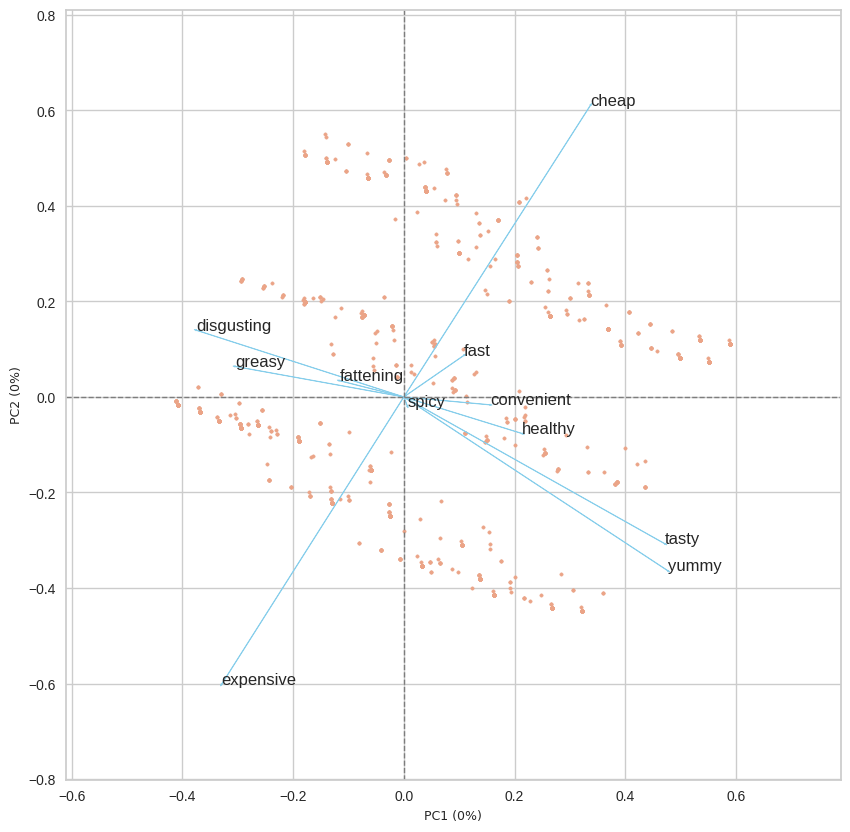

In [ ]:
# Perform cluster biplot
# cscore: PCA scores
# labels: Column labels of the original data
# var1 and var2: Indices of two variables to display in the biplot
# dim: Dimensions of the biplot
# show: Boolean to display the plot
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values, var1=0, var2=0, show=True, dim=(10, 10))

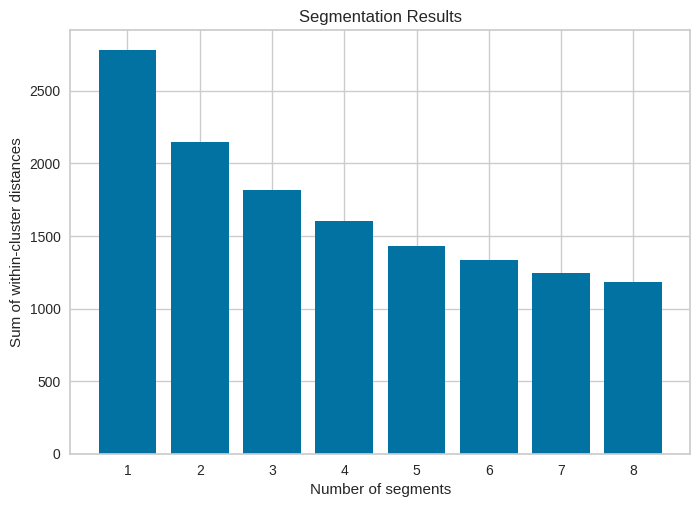

In [ ]:
# Set a random seed for reproducibility
np.random.seed(1234)
# Number of repetitions for k-means clustering
nrep = 10
# List to store within-cluster distances for different cluster numbers
within_cluster_distances = []

# Dictionary to store k-means models for different cluster numbers
MD_km28 = {}

# Perform k-means clustering for different numbers of clusters
num_segments = range(1, 9)
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

# Plot the within-cluster distances vs. the number of segments
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

<ipython-input-20-ba5f19939300>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)


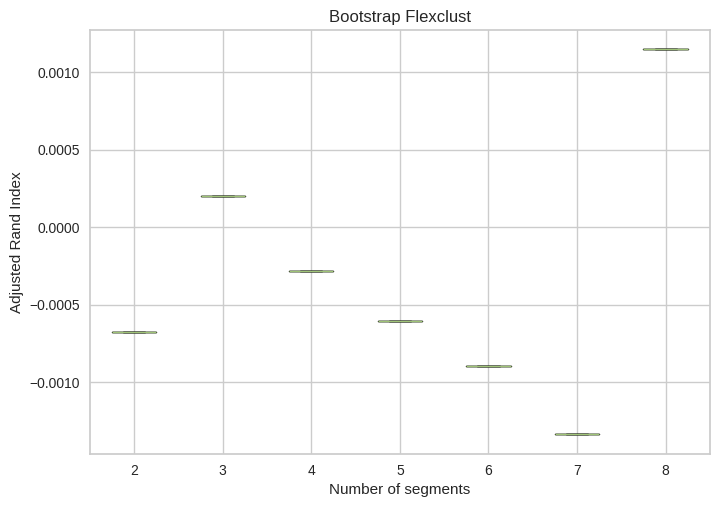

In [ ]:
# Perform bootstrap resampling to get multiple samples from the original data
bootstrap_samples = []
nboot=100
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

# List to store adjusted Rand index scores for different cluster numbers and bootstrap samples
adjusted_rand_index = []

# Perform k-means clustering for different numbers of clusters on each bootstrap sample
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list for easier plotting
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index for different cluster numbers
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

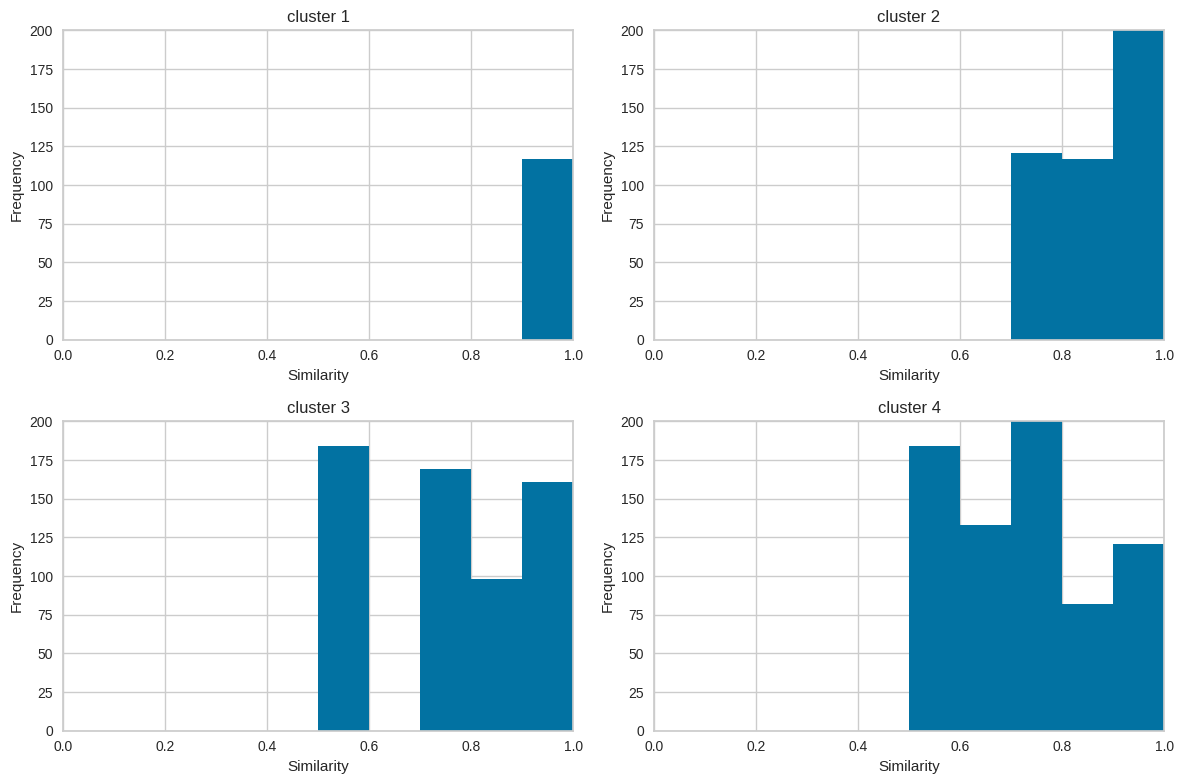

In [ ]:
# Define plotting parameters for the histograms of similarity scores for each cluster
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create subplots to show histograms for each cluster
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through the first 4 clusters
for i in range(1, 5):
    # Predict cluster labels and calculate similarity scores for each data point
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram for the similarity scores
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

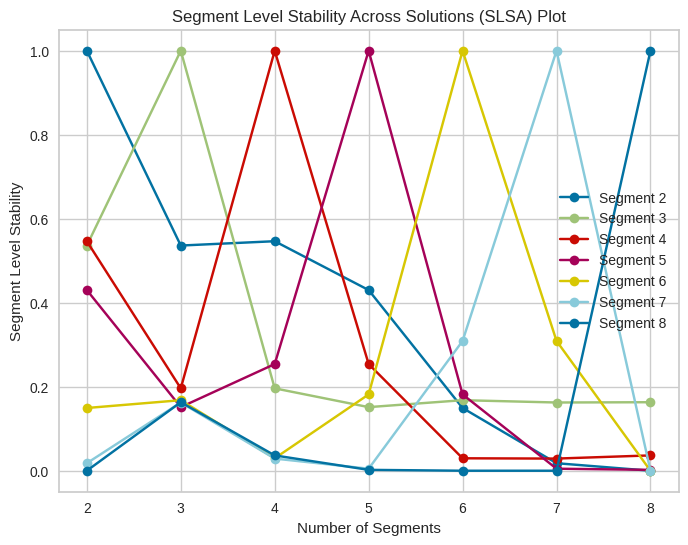

In [ ]:
# Define the range of number of segments to consider
num_segments = range(2, 9)

# Create an empty list to store segment stability for each number of segments
segment_stability = []
for segment in range(2, 9):
    # Predict cluster labels for the given number of segments
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

# Plotting the Segment Level Stability Across Solutions (SLSA) plot
plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    # Calculate and plot the mean segment level stability for each number of segments
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

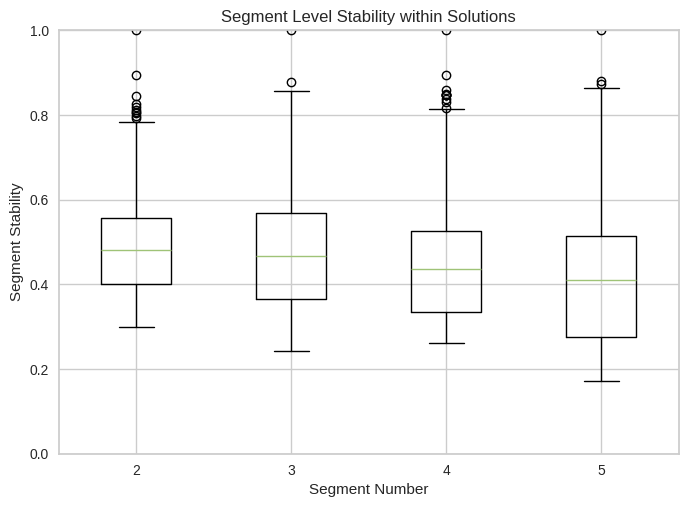

In [ ]:
# Define the number of segments for which stability will be analyzed
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

# Calculate cluster labels and similarities for each segment solution
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

# Calculate normalized segment stability values for each segment solution
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Plotting the boxplot for segment stability within solutions
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [ ]:
from scipy.stats import entropy

# Define the range of 'k' values (number of clusters) to consider
np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

# Calculate various information criteria for each 'k' value
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])
print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


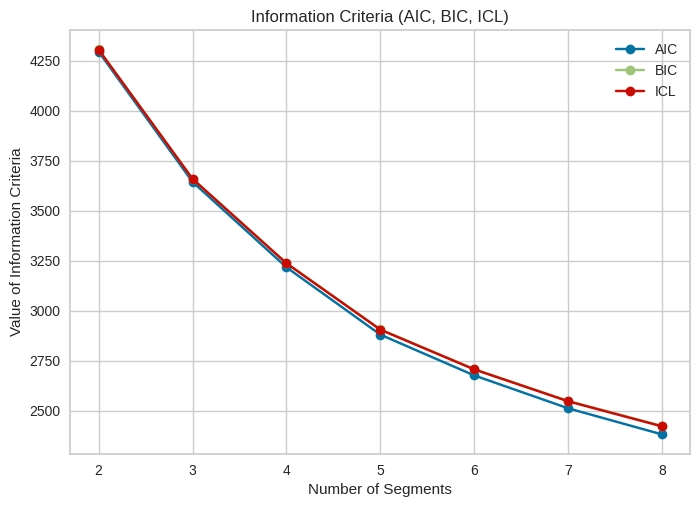

In [ ]:
# Plotting the information criteria (AIC, BIC, ICL) for different 'k' values
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
# Define the number of clusters
k = 4
# Use KMeans to perform clustering on MD
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)
#Use GaussianMixture to perform clustering on MD
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

# Step 3: Create a DataFrame to store the clustering results from KMeans and GaussianMixture
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Step 4: Select the data points belonging to cluster 3 from GaussianMixture clustering results
MD_m4 = MD[results['mixture'] == 3]

# Step 5: Perform KMeans clustering on the selected data points
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Step 6: Create a new DataFrame to store the clustering results from the second KMeans
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Step 7: Print cross-tabulation of the original KMeans and GaussianMixture clustering results
print(pd.crosstab(results['kmeans'], results['mixture']))

# Step 8: Print cross-tabulation of the original KMeans and second KMeans clustering results
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
# Step 9: Fit GaussianMixture with n_components=4 on the full MD dataset

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)
# Step 10: Calculate log-likelihood for the full MD dataset using the first GaussianMixture model

log_likelihood_m4a = gmm_m4a.score(MD)
# Step 11: Fit GaussianMixture with n_components=4 on the full MD dataset again
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)
# Step 12: Calculate log-likelihood for the full MD dataset using the second GaussianMixture model

log_likelihood_m4 = gmm_m4.score(MD)
#Print the log-likelihood results
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [ ]:
#Count the occurrences of each unique value in the 'Like' column
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

# Step 15: Print the reversed counts of unique values in the 'Like' column
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [ ]:
#Define a mapping of string values to numeric codes for the 'Like' column
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

# Step 17: Create a new column 'Like.n' in the DataFrame 'data' with numeric codes
data['Like.n'] = data['Like'].map(like_mapping)

# Step 18: Count the occurrences of each unique value in the 'Like.n' column
like_n_counts = data['Like.n'].value_counts()

# Step 19: Print the counts of unique values in the 'Like.n' column
print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [ ]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
#Extract independent variables for regression using patsy dmatrices
independent_vars = data.columns[0:11]
formula_str = ' + '.join(independent_vars)
formula_str = 'Like ~ ' + formula_str

# Step 21: Create the design matrix 'f' for the regression model
f = dmatrices(formula_str, data=data)[1]

# Step 22: Convert the design matrix 'f' to a numpy array for GaussianMixture
X = dmatrix(f.design_info, data=data)

# Step 23: Fit GaussianMixture model with n_components=2 on the design matrix 'X'
n_components = 2
n_init = 10
verbose = False
n_rep = 10
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X)

# Step 24: Print the GaussianMixture model after fitting
print(MD_reg2)

# Step 25: Calculate and print the sizes of each cluster in the GaussianMixture model
cluster_sizes = np.bincount(model.predict(X))
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


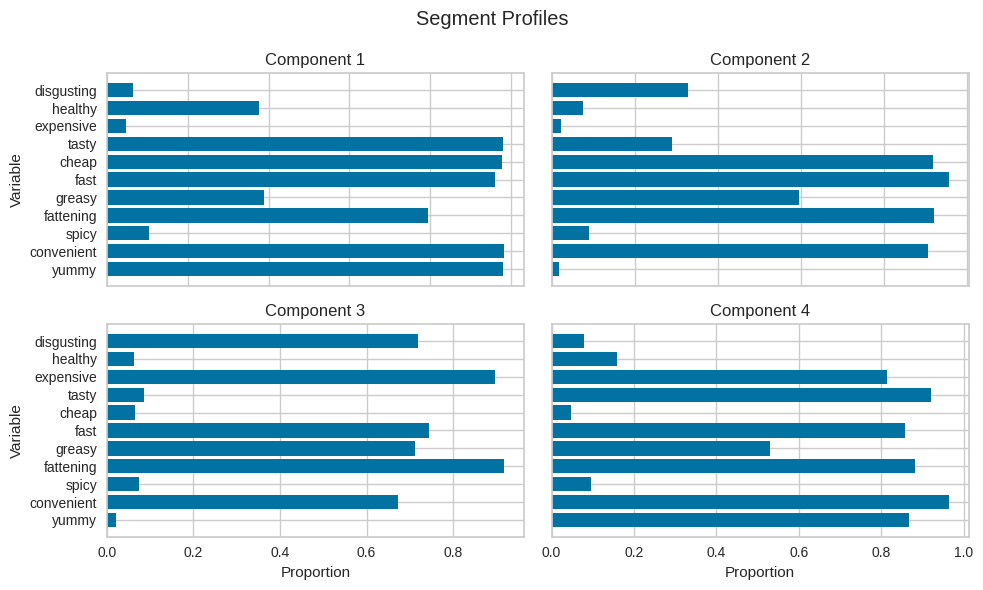

In [ ]:
# Assuming 'MD_km28' has 28 columns, and '4' is one of the columns representing the cluster labels
kmeans = MD_km28['4']
labels = kmeans.labels_

# Group the data by cluster labels and calculate the mean for each cluster
MD_mean = MD.groupby(labels).mean()

# Create a 2x2 subplots figure to display the bar plots of the cluster profiles
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the bar plots for each component (1 to 4) in separate subplots
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set labels and ticks for each subplot
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

# Hide the x-labels and y-labels of inner subplots to avoid overlap
for ax in axs.flat:
    ax.label_outer()

# Add the overall title and adjust the layout
fig.suptitle('Segment Profiles')
fig.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


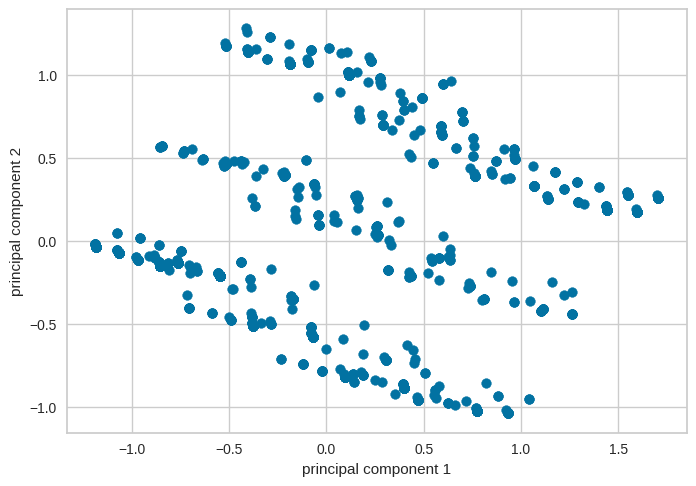

In [ ]:
# Create a KMeans object with 4 clusters and fit it to 'MD'
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

# Perform PCA with 2 components on 'MD'
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

# Create a scatter plot to visualize the data points in the reduced 2D space
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/Feynn Labs Datasets/mcdonalds.csv")
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


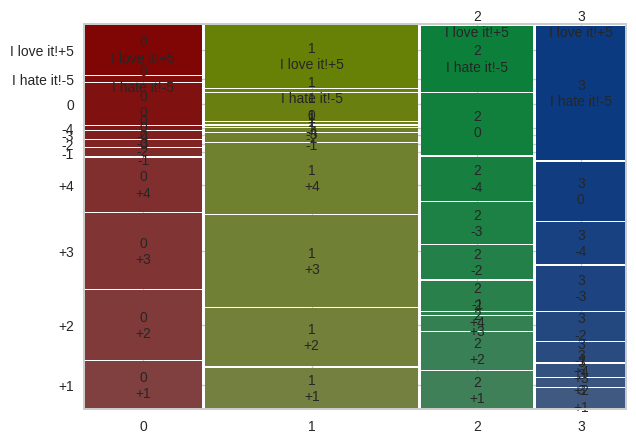

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
# Assuming 'data1' is the dataframe containing the categorical variables
# Define a function to perform label encoding for a given column 'x'
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Label encode each categorical column
for i in cat:
    labelling(i)

# Extract only the categorical columns from 'data1'
df_eleven = data1.loc[:, cat]

# Perform KMeans clustering with 4 clusters on the categorical data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add a new column 'cluster_num' to 'data1' containing the cluster labels
data1['cluster_num'] = kmeans.labels_

# Create a cross-tabulation between 'cluster_num' and 'Like' columns
crosstab = pd.crosstab(data1['cluster_num'], data1['Like'])

# Reordering columns for better visualization
# crosstab = crosstab[['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']]

# Create a mosaic plot to visualize the relationship between 'cluster_num' and 'Like'
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()



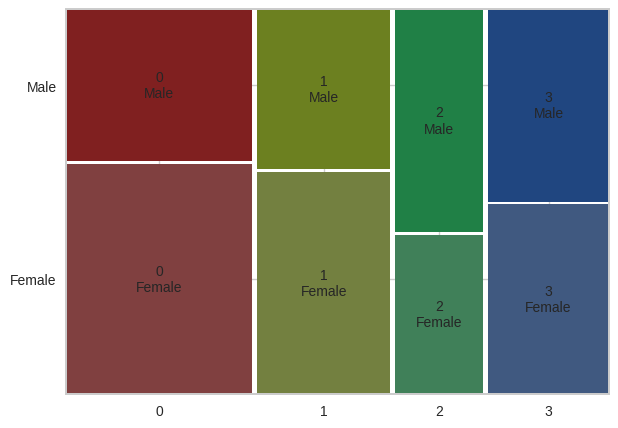

In [ ]:
#Importing Require Libries
from statsmodels.graphics.mosaicplot import mosaic

# Assuming that 'MD_km28' is a DataFrame containing clustered data, and 'data' is another DataFrame containing the data with the 'Gender' column.
# Extract the cluster labels for the cluster number 4 from the 'MD_km28' DataFrame
MD_k4 = MD_km28['4']

# Get the cluster labels from 'MD_k4'
k4 = MD_k4.labels_

# Create a cross-tabulation (contingency table) between the cluster labels 'k4' and the 'Gender' column in the 'data' DataFrame
ct = pd.crosstab(k4, data1['Gender'])

# Visualize the cross-tabulation using a mosaic plot
mosaic(ct.stack(), gap=0.01)

# Show the plot
plt.show()

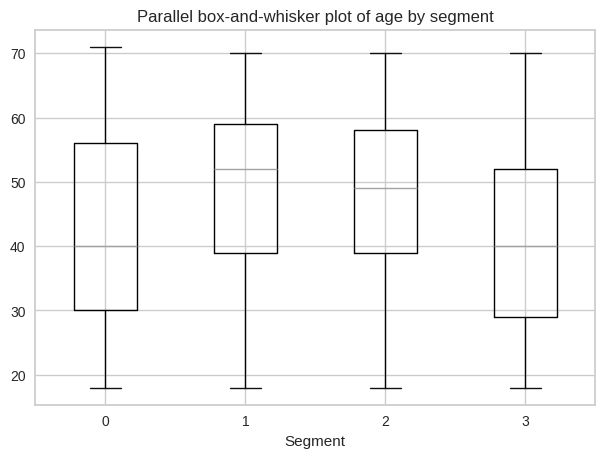

In [ ]:
# Create a new DataFrame 'df' with 'Segment' and 'Age' columns from the original dataset 'data'.
df = pd.DataFrame({'Segment': k4, 'Age': data1['Age']})

# Generate a box-and-whisker plot of 'Age' grouped by 'Segment'.
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [ ]:
# Convert categorical variables 'VisitFrequency', 'Like', and 'Gender' to numerical values using LabelEncoder.
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [ ]:
# Group the data by 'cluster_num' and calculate the mean of 'VisitFrequency', 'Like', and 'Gender' for each segment.

data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [ ]:
# Convert the groupby results to DataFrames for further processing.
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


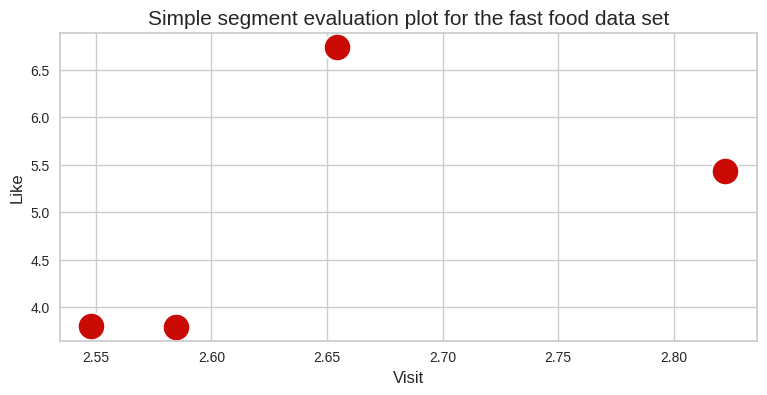

In [ ]:
#importing Seaborn Libray

import seaborn as sns

#Merge the 'Gender', 'Like', and 'VisitFrequency' DataFrames into a single DataFrame 'segment' based on 'cluster_num'.
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Create a scatter plot to visualize the relationship between 'VisitFrequency' and 'Like' for each segment.
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()